# Amazon Fine Food Reviews


##### Meks Egbuchunam

Dataset: [Amazon Fine Foods Reviews](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)

In this project, I will analyze the Amazon Fine Food Reviews dataset to explore how various features and patterns are associated with positive or negative sentiment in customer reviews. I will also evaluate how the dataset’s metadata compares to the substantive text of the reviews in contributing to overall prediction accuracy. Natural Language Processing (NLP) and machine learning techniques will be applied to gain actionable insights into customer behavior and feedback that could support future marketing and product enhancement.

## Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("D:/DS Projects/Amazon Food Reviews/Reviews.csv")

clone_df = df.copy()

clone_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


----------------------------------

## Data Cleaning/Preprocessing

In [2]:
df.shape

(568454, 10)

In [3]:
print(f"'ProductId': {clone_df['ProductId'].nunique()}")
print(f"'UserId': {clone_df['UserId'].nunique()}")
print(f"'ProfileName': {clone_df['ProfileName'].nunique()}")

'ProductId': 74258
'UserId': 256059
'ProfileName': 218415


In [4]:
df.groupby('ProfileName')['UserId'].nunique().value_counts().head(10)

UserId
1     208309
2       5721
3       1662
4        755
5        397
6        277
7        191
8        157
9        109
10       102
Name: count, dtype: int64

In [5]:
clone_df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

It is immediately clear that the `Id` column can be dropped.

In [6]:
clone_df.drop(['Id'], axis = 1, inplace = True)

clone_df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
#Finding missing values

clone_df.isnull().sum()


ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Because the `Summary` column contains free-form text, it makes more sense to drop rows with missing values rather than fill them with non-representative data. Since there are only 27 missing rows, the resulting data loss is negligible.

The `ProfileName` column is less relevant to the analysis, so we can fill its 26 missing values with `Unknown` instead of dropping 26 additional rows.

In [10]:
clone_df.dropna(subset = ['Summary'], inplace = True)

clone_df.shape

(568427, 9)

In [8]:
clone_df['ProfileName'].fillna('Unknown', inplace=True)

In [11]:
clone_df.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [12]:
clone_df.duplicated().sum()

281

Some rows seem to be duplicated. These rows should be dropped.

In [13]:
# Checking the duplicates

clone_df[clone_df.duplicated()]

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
6517,B005O8BLLU,APH7I7OZ8WUJP,J. Simpson,0,0,5,1347494400,Great first food,This is excellent for a baby's first taste. Th...
8523,B003VXFK44,A10H24TDLK2VDP,William Jens Jensen,0,0,3,1309824000,Unremarkable,"First, let me say that I prefer extra-bold K-C..."
9232,B006N3IG4K,A10H24TDLK2VDP,William Jens Jensen,0,0,3,1309824000,Unremarkable,"First, let me say that I prefer extra-bold K-C..."
15528,B000255OIG,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,5,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...
19705,B0030VBRIU,A2MF0C4E7GYCI,"VW ""VW""",0,0,5,1305331200,My son loves this,My son loves this food. He is 16 months now a...
...,...,...,...,...,...,...,...,...,...
539218,B001BDDT8K,A3FKGKUCI3DG9U,Paul Moskowitz,0,0,3,1229472000,"If it looks good, is it good for the cats?",My two traditional striped cats eat mostly dry...
539359,B001BDDT8K,AF3BYMPWKWO8F,Joe MacBu,3,3,1,1243555200,Warning: Contains Menadione,"According to the manufacturer's website, this ..."
541565,B00014JYNO,AM820RV0VN0U,windie809,0,0,5,1339459200,love these protein bars!,if you are looking for a protein bar that does...
546112,B003YSV5ZY,A2GSNN6EH9K2HD,A. Meyer,0,0,5,1301875200,Very Tasty,These cereal bars are fantastic. All of their ...


In [14]:
dupes = clone_df[clone_df.duplicated()]

print(f"{dupes['Text'].nunique()}")

print(f"{dupes['Summary'].nunique()}")

55
55


In [15]:
# Dropping duplicates

clone_df.drop_duplicates(inplace = True)

clone_df.shape

(568146, 9)

In [16]:
clone_df.duplicated().sum()

0

In [17]:
# Converting the time to be more readable

clone_df['Time'] = pd.to_datetime(clone_df['Time'], unit = 's')

clone_df['Time'].head(10)

0   2011-04-27
1   2012-09-07
2   2008-08-18
3   2011-06-13
4   2012-10-21
5   2012-07-12
6   2012-06-20
7   2012-05-03
8   2011-11-23
9   2012-10-26
Name: Time, dtype: datetime64[ns]

--------------------

## EDA

In [18]:
clone_df.shape

(568146, 9)

In [19]:
clone_df.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [20]:
clone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568146 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductId               568146 non-null  object        
 1   UserId                  568146 non-null  object        
 2   ProfileName             568146 non-null  object        
 3   HelpfulnessNumerator    568146 non-null  int64         
 4   HelpfulnessDenominator  568146 non-null  int64         
 5   Score                   568146 non-null  int64         
 6   Time                    568146 non-null  datetime64[ns]
 7   Summary                 568146 non-null  object        
 8   Text                    568146 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 43.3+ MB


In [21]:
clone_df.dtypes

ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                      datetime64[ns]
Summary                           object
Text                              object
dtype: object

In [22]:
clone_df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568146.000000,568146.000000,568146.000000,568146
mean,1.744244,2.228288,4.183317,2011-01-29 01:41:24.464204800
min,0.000000,0.000000,1.000000,1999-10-08 00:00:00
25%,0.000000,0.000000,4.000000,2010-04-15 00:00:00
50%,0.000000,1.000000,5.000000,2011-07-20 00:00:00
75%,2.000000,2.000000,5.000000,2012-03-26 00:00:00
max,866.000000,923.000000,5.000000,2012-10-26 00:00:00
std,7.638330,8.290323,1.310336,NaN


`HelpfulnessNumerator` and `HelpfulnessDenominator` will be summarized into one column for readability.

In [23]:
# making a new column called 'HelpfulnessRatio'

clone_df['HelpfulnessRatio'] = np.where(
    clone_df['HelpfulnessDenominator'] > 0,
    clone_df['HelpfulnessNumerator'] / clone_df['HelpfulnessDenominator'],
    np.nan
)

In [24]:
clone_df.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'HelpfulnessRatio'],
      dtype='object')

In [25]:
clone_df['HelpfulnessRatio'].describe()

count    298297.000000
mean          0.777072
std           0.346237
min           0.000000
25%           0.600000
50%           1.000000
75%           1.000000
max           3.000000
Name: HelpfulnessRatio, dtype: float64

Next I will examine the `Score` column and its distribution

In [26]:
clone_df['Score'].value_counts().sort_index()

Score
1     52231
2     29740
3     42612
4     80627
5    362936
Name: count, dtype: int64

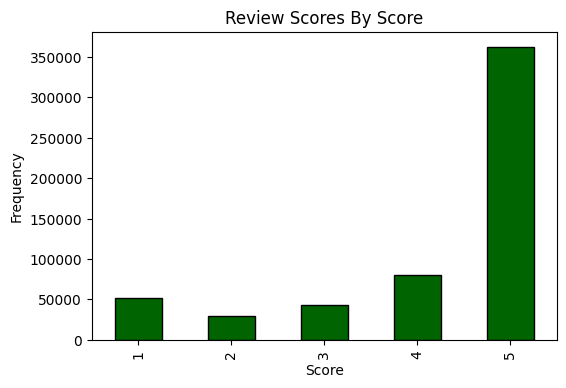

In [27]:
# Plotting sorted value counts

plt.figure(figsize=(6,4))
clone_df['Score'].value_counts().sort_index().plot(kind='bar', color='DarkGreen', edgecolor='black')
plt.title('Review Scores By Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


The visualization shows a left or negative skew of the data, with most reviews being a 5 (4 is in a distant second).

In [28]:
# checking how 'HelpfulnessRatio' interacts with 'Score'

clone_df.groupby('Score')['HelpfulnessRatio'].mean()

Score
1    0.539134
2    0.567228
3    0.625777
4    0.790842
5    0.871522
Name: HelpfulnessRatio, dtype: float64

As seen in the output above, higher ratings tend to be associated with greater helpfulness, indicating a positive correlation between `Score` and `HelpfulnessRatio`. This may suggest that readers perceive positive sentiment as a marker of credibility. Taking a more skeptical angle, however, this trend could also point to the presence of bots or other forms of artificial inflation boosting positive reviews, possibly at the behest of a benefitting party.

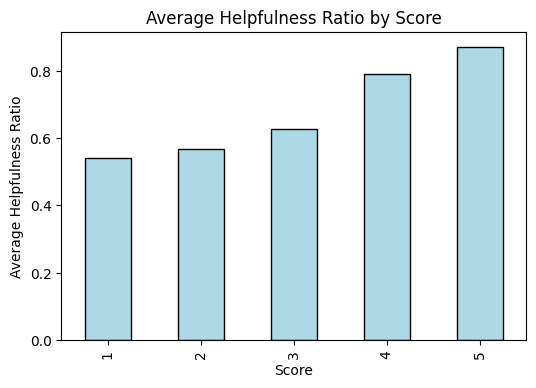

In [29]:
#Visualizing 'HelpfulnessRatio' and 'Score' relationship

plt.figure(figsize=(6,4))
clone_df.groupby('Score')['HelpfulnessRatio'].mean().plot(
    kind='bar', color='lightblue', edgecolor='Black'
)
plt.title('Average Helpfulness Ratio by Score')
plt.xlabel('Score')
plt.ylabel('Average Helpfulness Ratio')
plt.show()


The increase in average helpfulness ratio seems to be proportionate across scores, suggesting a steady, positive relationship between the two.

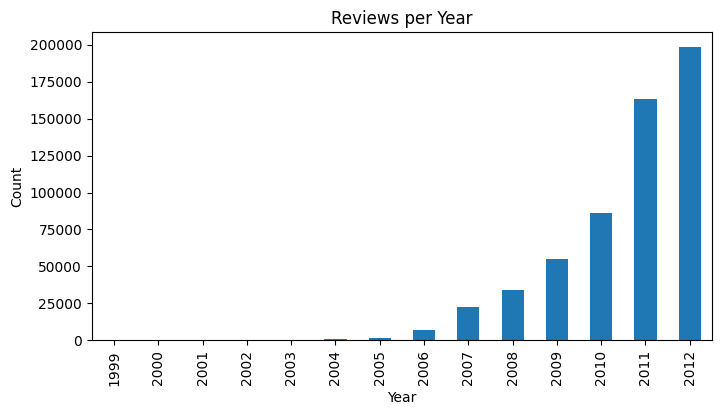

In [30]:
# Checking the number of reviews made per year

clone_df['Year'] = clone_df['Time'].dt.year
clone_df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title('Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

The above chart shows a steady increase in reviews per year over the years. That said, the number of reviews basically doubled between the years 2011 and 2012.

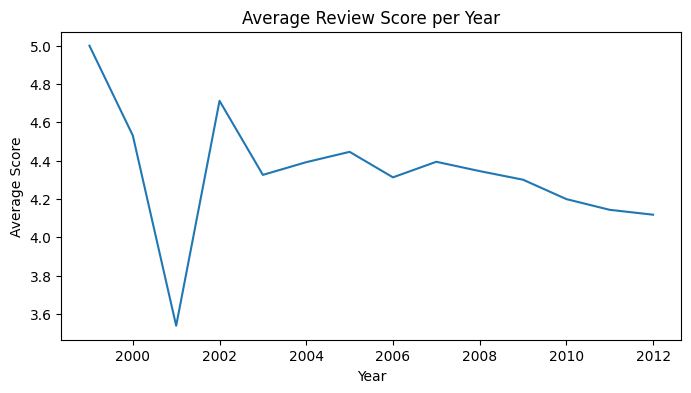

In [31]:
# Checking average scores per year

clone_df.groupby('Year')['Score'].mean().plot(figsize=(8,4))
plt.title('Average Review Score per Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

In [32]:
clone_df['Year'].value_counts().sort_index()

Year
1999         6
2000        32
2001        13
2002        73
2003       132
2004       561
2005      1334
2006      6666
2007     22260
2008     34157
2009     55287
2010     85827
2011    163199
2012    198599
Name: count, dtype: int64

Aside from the noticeable decline in average scores over time, there was a conspicuous dip in the year 2001. I implemented a review count per year to gain greater insight into the anomaly. Using the information gained from this count, I was able to conclude that 2001 shows no meaningful trend, as the sample size is simply too small.

In [33]:
# Checking the number of characters in each review text

clone_df['TextLength'] = clone_df['Text'].apply(len)

In [34]:
clone_df['TextLength'].head(10)

0    263
1    190
2    509
3    219
4    140
5    416
6    304
7    140
8    131
9    137
Name: TextLength, dtype: int64

In [35]:
# Checking the average of characters in each review text

clone_df.groupby('Score')['TextLength'].mean()

Score
1    476.628745
2    490.942771
3    520.099385
4    496.494871
5    402.348546
Name: TextLength, dtype: float64

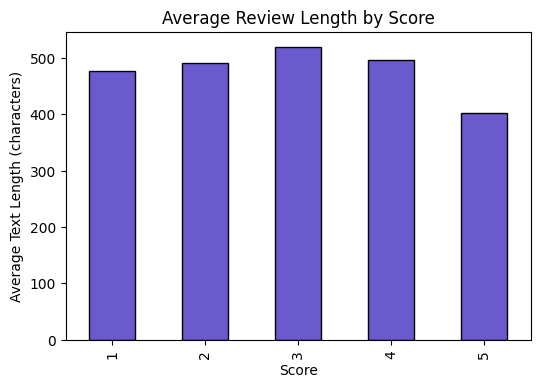

In [36]:
# Plotting above output

plt.figure(figsize=(6,4))
clone_df.groupby('Score')['TextLength'].mean().plot(kind='bar', color='slateblue', edgecolor='black')
plt.title('Average Review Length by Score')
plt.xlabel('Score')
plt.ylabel('Average Text Length (characters)')
plt.show()


As seen by the distribution, the highest number of characters for review text seems to be for scores of 3, with a steady decline for scores both higher and lower than three. This could be due to median review scores having more thought put into them, or a need to explain why the product is mediocre.

On the other hand, reviews with a score of five receive the least amount of text, while reviews with a score of one are second to last. Following the same logic, polarized scores may not need as much explanation, or may simply not have as much thought put into them, indicating a review that may be based more on mood or how one feels at the time.

In [37]:
# Doing the same thing but counting words instead of characters

clone_df['WordCount'] = clone_df['Text'].apply(lambda x: len(str(x).split()))

In [38]:
clone_df['WordCount'].head()

0    48
1    31
2    94
3    41
4    27
Name: WordCount, dtype: int64

In [39]:
clone_df.groupby('Score')['WordCount'].mean()

Score
1    87.054833
2    90.090720
3    95.611823
4    91.374428
5    74.150980
Name: WordCount, dtype: float64

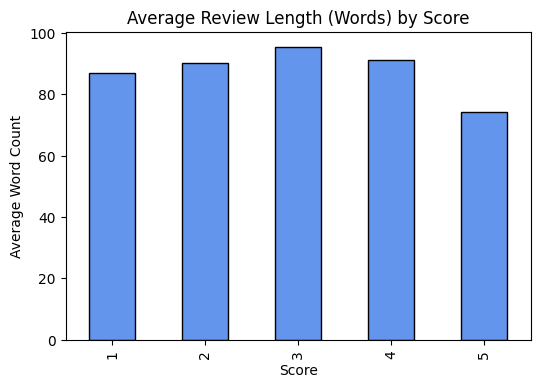

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
clone_df.groupby('Score')['WordCount'].mean().plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Average Review Length (Words) by Score')
plt.xlabel('Score')
plt.ylabel('Average Word Count')
plt.show()

As depicted, the distribution among the five scores is largely the same whether characters or words are being counted. Here, where the number of words per review was measured, we see scores of 3 with the highest word counts, and scores of both 1 and 5 in the bottom two.

In [41]:
# Checking to see if longer reviews tend to be labeled as more helpful or not

clone_df[['WordCount', 'HelpfulnessRatio']].corr()


,WordCount,HelpfulnessRatio
WordCount,1.00000,0.04079
HelpfulnessRatio,0.04079,1.00000


There appears to be next to no relationship between word count and helpfulness in the dataset (0.041). This indicates that the number of words or characters does not have much effect on perceived helpfulness. This perception may instead be more closely tied to factors such as review age, score, or visibility. The many reviews with no helpfulness votes are not skewing the relationship, as they appear as `NaN` in the dataset and are excluded from the calculation.

In [43]:
# Getting an idea of user activity regarding reviews

user_reviewing = clone_df['UserId'].value_counts()

user_reviewing.describe()

count    256056.000000
mean          2.218835
std           4.430088
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         447.000000
Name: count, dtype: float64

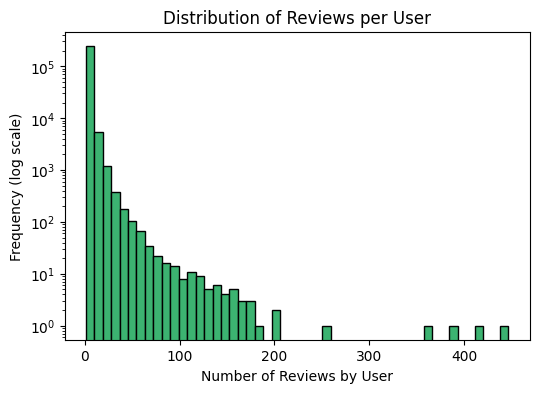

In [45]:
# Visualizing user activity

plt.figure(figsize=(6,4))
plt.hist(clone_df['UserId'].value_counts(), bins=50, color='mediumseagreen', edgecolor='black')
plt.yscale('log')
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews by User')
plt.ylabel('Frequency (log scale)')
plt.show()


In [50]:
clone_df['UserId'].value_counts().head(50)


UserId
A3OXHLG6DIBRW8    447
A1YUL9PCJR3JTY    418
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    182
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
A2SZLNSI5KOQJT    175
AZV26LP92E6WU     167
AY1EF0GOH80EK     162
A31N6KB160O508    162
A2FRFAQCWZJT3Q    161
A29JUMRL1US6YP    158
A1UQBFCERIP7VJ    157
AKMEY1BSHSDG7     155
A1LZJZIHUPLDV4    154
A1WX42M589VAMQ    151
A2Y8IDC1FKGNJC    150
A3D6OI36USYOU1    150
A3HPCRD9RX351S    149
A2PNOU7NXB1JE4    143
A33AQPJYH7UUXR    142
AKZKG2Z7CNV27     141
A35R32TA60XD57    141
A1IU7S4HCK1XK0    140
A1X1CEGHTHMBL1    135
A36WGHR8TO5DKT    134
A2DPYMNI2HCIOI    133
AQLL2R1PPR46X     133
A3FY3H6F4249E0    127
A1HRYC60VTMYC0    126
ADS5APY1NKTL4     125
A2GEZJHBV92EVR    125
ALSAOZ1V546VT     123
A3F3B1JPACN215    121
A1P2XYD265YE21    120
A3FKGKUCI3DG9U    119
A2XNOB1T796Y6B    119
A36MP37DITBU6F    118
A2R6RA8FRBS608    117
A3QNQQKJTL76H0    116
A2M9D9BDHONV3Y    115
A1Z

The `describe()` info and the histogram show data that is positively skewed. Most reviewers contribute 1-2 reviews to the website, while a very small minority of the reviewers contribute hundreds of reviews. 

In [51]:
# Making a new dataframe consisting of User ID's and their average helpfulness ratio. This will come in handy when determining the relationship between reviewer prominence and helpfulness ratio.

reviewer_stats = (
    clone_df.groupby('UserId')
    .agg({
        'HelpfulnessRatio': 'mean',
        'UserId': 'count'
    })
    .rename(columns={'UserId': 'ReviewCount'})
)


In [54]:
reviewer_stats.head()

,HelpfulnessRatio,ReviewCount
UserId,,
#oc-R103C0QSV1DF5E,0.5,1
#oc-R109MU5OBBZ59U,0.0,1
#oc-R10LFEMQEW6QGZ,0.0,1
#oc-R10LT57ZGIB140,NaN,1
#oc-R10UA029WVWIUI,NaN,1


In [55]:
reviewer_stats[['ReviewCount', 'HelpfulnessRatio']].corr()

,ReviewCount,HelpfulnessRatio
ReviewCount,1.000000,-0.021588
HelpfulnessRatio,-0.021588,1.000000


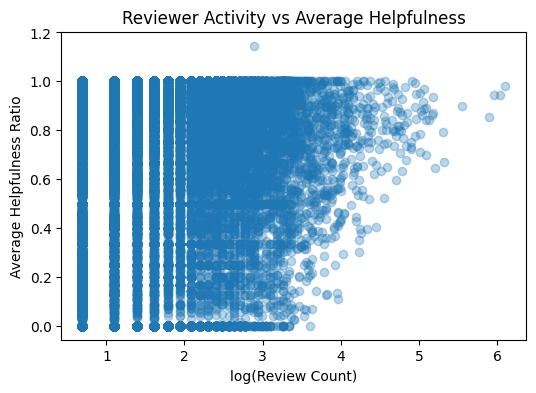

In [56]:
plt.figure(figsize=(6,4))
plt.scatter(np.log1p(reviewer_stats['ReviewCount']),
            reviewer_stats['HelpfulnessRatio'],
            alpha=0.3)
plt.title('Reviewer Activity vs Average Helpfulness')
plt.xlabel('log(Review Count)')
plt.ylabel('Average Helpfulness Ratio')
plt.show()


In [57]:
top_reviewers = reviewer_stats.nlargest(20, 'ReviewCount')
bottom_reviewers = reviewer_stats.nsmallest(20, 'ReviewCount')

print("Top 20 avg helpfulness:", top_reviewers['HelpfulnessRatio'].mean())
print("Bottom 20 avg helpfulness:", bottom_reviewers['HelpfulnessRatio'].mean())


Top 20 avg helpfulness: 0.8590521277990385
Bottom 20 avg helpfulness: 0.4423314780457637


The number of reviews written by a given reviewer is weakly correlated with their average helpfulness ratio (approximately -0.022), indicating that prominence and perceived helpfulness have little to do with one another. That said, reviewers with the highest number of reviews experienced almost double the perceived helpfulness than those with the fewest reviews.

In [58]:
clone_df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,Year,TextLength,WordCount
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,2011,263,48
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,2012,190,31
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,2008,509,94
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,2011,219,41
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,2012,140,27


---------

## Feature Engineering

In [59]:
# Cloning the dataframe again for caution

model_df = clone_df.copy()

In [60]:
model_df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,Year,TextLength,WordCount
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,2011,263,48
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,2012,190,31
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,2008,509,94
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,2011,219,41
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,2012,140,27


In [61]:
model_df.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'HelpfulnessRatio', 'Year', 'TextLength', 'WordCount'],
      dtype='object')

In [62]:
# Dropping the 'ProfileName' column as it is redundant

model_df.drop(columns = ['ProfileName'], inplace = True)

In [63]:
model_df.columns

Index(['ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'HelpfulnessRatio', 'Year',
       'TextLength', 'WordCount'],
      dtype='object')

I will now remove  the `NaN` values in the `HelpfulnessRatio` column. The best approach would be to fill the `NaN` values with 0. Dropping all the rows would remove too much data (more than half of all of its entries are `NaN`)

In [67]:
model_df['HelpfulnessRatio'].isnull().sum()

269849

In [68]:
model_df['HelpfulnessRatio'].fillna(0, inplace = True)

In [69]:
model_df['HelpfulnessRatio'].isnull().sum()

0

In [73]:
model_df.dtypes

ProductId                         object
UserId                            object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                      datetime64[ns]
Summary                           object
Text                              object
HelpfulnessRatio                 float64
Year                               int32
TextLength                         int64
WordCount                          int64
dtype: object

I will be scaling the `Year` column so that the model does not misinterpret the years of the reviews as continuous numerical values. I will also be scaling the `TextLength` and `WordCount` columns.

In [74]:
model_df['ReviewAge'] = model_df['Year'] - model_df['Year'].min()

model_df['ReviewAge']

0         12
1         13
2          9
3         12
4         13
          ..
568449    12
568450    13
568451    13
568452    13
568453    13
Name: ReviewAge, Length: 568146, dtype: int32

In [76]:
model_df.columns

Index(['ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'HelpfulnessRatio', 'Year',
       'TextLength', 'WordCount', 'ReviewAge'],
      dtype='object')

In [83]:
# Scaling 'Text:ength' and 'WordCount'

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model_df[['TextLength', 'WordCount']] = scaler.fit_transform(model_df[['TextLength', 'WordCount']])

model_df[['TextLength', 'WordCount']].head()

,TextLength,WordCount
0,-0.389069,-0.406231
1,-0.553237,-0.620532
2,0.164152,0.173641
3,-0.488020,-0.494473
4,-0.665680,-0.670955


Created a `Sentiment` feature to simplify classification. A 1 to 5 score scale can be too nuanced and overlapping in tone, so grouping them into broader sentiment categories makes the data easier to interpret.

In [84]:
def sentiment_group(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

model_df['Sentiment'] = model_df['Score'].apply(sentiment_group)


In [88]:
model_df['Sentiment'].value_counts()

Sentiment
positive    443563
negative     81971
neutral      42612
Name: count, dtype: int64

In [89]:
model_df.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,Year,TextLength,WordCount,ReviewAge,Sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,2011,-0.389069,-0.406231,12,positive
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,2012,-0.553237,-0.620532,13,negative
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,2008,0.164152,0.173641,9,positive
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,2011,-0.488020,-0.494473,12,negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,0.0,2012,-0.665680,-0.670955,13,positive


In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
model_df['Sentiment'] = le.fit_transform(model_df['Sentiment'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'negative': 0, 'neutral': 1, 'positive': 2}

In [91]:
# Dropping unnecessary columns. The Year column is now obsolete after creating a new, scaled column.

model_df.drop(['ProductId', 'UserId', 'Year'], axis=1, inplace=True)

model_df.columns

Index(['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'HelpfulnessRatio', 'TextLength', 'WordCount',
       'ReviewAge', 'Sentiment'],
      dtype='object')

In [92]:
# Dropping the 'Time' column as well, as it also serves little purpose

model_df.drop(['Time'], axis = 1, inplace = True)

model_df.columns

Index(['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Summary',
       'Text', 'HelpfulnessRatio', 'TextLength', 'WordCount', 'ReviewAge',
       'Sentiment'],
      dtype='object')

With that, the dataset should be ready for training and testing.

-----------------------

## Modeling Part 1

 I will be starting with only the text of the dataset to gather an idea of baseline performance

In [95]:
# Train/Test split.

from sklearn.model_selection import train_test_split

X = model_df['Text']
y = model_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 454516
Testing samples: 113630


In [96]:
# TF-IDF Vectorization
# Converting the text data into numerical data so the model can interpret it

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape (train):", X_train_tfidf.shape)
print("TF-IDF shape (test):", X_test_tfidf.shape)


TF-IDF shape (train): (454516, 5000)
TF-IDF shape (test): (113630, 5000)


In [98]:
# Beginning Modeling. Starting with a Logistic Regression Model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)

y_pred = log_reg.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8660388981782979

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70     16394
           1       0.52      0.17      0.26      8523
           2       0.90      0.97      0.93     88713

    accuracy                           0.87    113630
   macro avg       0.72      0.60      0.63    113630
weighted avg       0.84      0.87      0.85    113630


Confusion Matrix:
 [[11024   592  4778]
 [ 1868  1452  5203]
 [ 2009   772 85932]]


The Logistic Regression model was very effective in capturing the `positive` reviews (scores of 4 or more), with a precision of 90% and a recall of 97%; near perfect. The same model did an adequate job at capturing the `negative` reviews, being able to predict 67% of all `negative` reviews with a 74% precision. However, it failed to capture most of the `neutral` reviews (17%). Even on rare occasions that it did, the accuracy of its predictions (52%) was only slightly better than 50%. One reason for this could be that the `neutral` category encompasses comparatively less data than both `negative` and `positive`, with only 42,612 data points. Another reason could be the ambiguous and variable nature of `neutral` reviews. This would make it hard for TF-IDF vectorization to find prominent patterns within the dataset. Regardless, further tweaking may be necessary.

In [102]:
# Now training the Naive Bayes model which a probabilistic approach to text classification.

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Accuracy: 0.8163513156736777

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.27      0.41     16394
           1       0.56      0.00      0.00      8523
           2       0.82      0.99      0.90     88713

    accuracy                           0.82    113630
   macro avg       0.74      0.42      0.44    113630
weighted avg       0.80      0.82      0.76    113630


Confusion Matrix:
 [[ 4502     7 11885]
 [  454    14  8055]
 [  463     4 88246]]


The Naive Bayes model performed at an accuracy of approximately 82%; however, it was very unbalanced in its predictions. The vast majority of its predictions were `positive` due to the probabilistic nature of the model, which meant that barely any true `negative` reviews were caught (negative review recall was 27% with an 83% precision). Additionally, next to no `neutral` reviews were caught, with an abysmal recall of 0% (only 14 were correctly identified). Even among the small number of `neutral` predictions, only slightly more than half were accurate. The model's inclination toward `positive` predictions was the primary reason for the 99% recall of all `positive` reviews (though only an 82% precision). This model may not be suited for datasets where one classification value heavily outweighs the others.

In [103]:
# Now using Linear SVM model, which tends to perform very well with high-dimensional data such as TF-IDF

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = LinearSVC(random_state=42)
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


C:\Users\max dore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8642083956701575

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70     16394
           1       0.57      0.09      0.16      8523
           2       0.89      0.97      0.93     88713

    accuracy                           0.86    113630
   macro avg       0.73      0.58      0.60    113630
weighted avg       0.84      0.86      0.84    113630


Confusion Matrix:
 [[11090   248  5056]
 [ 2094   794  5635]
 [ 2056   341 86316]]


The Linear SVM model performed on par with Logistic Regression for the most part, boasting equal F1 scores for `negative` and `positive` review predictions (70% and 93%, respectively), with only a few minor differences in recall and precision. However, like the others, it struggled to capture the `neutral` reviews. Its recall (9%) was about half that of the Logistic model, and although LSVM was marginally more precise in these predictions (57%), it failed to capture as many cases. The imbalance in predicting `neutral` values persists.

Though the models performed satisfactorily overall, their predictive imbalance became evident when identifying `neutral` reviews. To address this, I will employ greater specificity in TF-IDF to capture more neutral phrasing which should encourage a deeper understanding of the `neutral` reviews when converting. Using this new information, I can then attempt more training using the baseline models.

In [110]:
# Employing TF-IDF with a potentially deeper understanding of neutral sentiments

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=20000,
    ngram_range=(1, 2),
    sublinear_tf=True,
    min_df=3,
    max_df=0.9
)


In [109]:
# Logistic Regression with the updated vectorization

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)

y_pred = log_reg.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8660388981782979

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70     16394
           1       0.52      0.17      0.26      8523
           2       0.90      0.97      0.93     88713

    accuracy                           0.87    113630
   macro avg       0.72      0.60      0.63    113630
weighted avg       0.84      0.87      0.85    113630


Confusion Matrix:
 [[11024   592  4778]
 [ 1868  1452  5203]
 [ 2009   772 85932]]


The results shown for Logistic Regression are completely identical to its earlier training without vectorization optimization. This may indicate that vectorization is not the problem. I will continue modeling with the other two alglorithms to further confirm the problem.

In [112]:
# Naive Bayes with the updated vectorization

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.8163513156736777

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.27      0.41     16394
           1       0.56      0.00      0.00      8523
           2       0.82      0.99      0.90     88713

    accuracy                           0.82    113630
   macro avg       0.74      0.42      0.44    113630
weighted avg       0.80      0.82      0.76    113630


Confusion Matrix:
 [[ 4502     7 11885]
 [  454    14  8055]
 [  463     4 88246]]


In [113]:
# Linear SVM with the updated vectorization

svm = LinearSVC(random_state=42)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


C:\Users\max dore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8642083956701575

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70     16394
           1       0.57      0.09      0.16      8523
           2       0.89      0.97      0.93     88713

    accuracy                           0.86    113630
   macro avg       0.73      0.58      0.60    113630
weighted avg       0.84      0.86      0.84    113630


Confusion Matrix:
 [[11090   248  5056]
 [ 2094   794  5635]
 [ 2056   341 86316]]


The results were exactly the same across the other two model results as well. Balancing of the algorithms themselves is necessary. I will attempt to manipulate class weights instead.

In [115]:
# Logistic Regression with class weight manipulated

log_reg_balanced = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

log_reg_balanced.fit(X_train_tfidf, y_train)
y_pred_balanced = log_reg_balanced.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))


Accuracy: 0.7776643492035554

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.74      0.68     16394
           1       0.25      0.63      0.36      8523
           2       0.97      0.80      0.88     88713

    accuracy                           0.78    113630
   macro avg       0.62      0.72      0.64    113630
weighted avg       0.86      0.78      0.81    113630


Confusion Matrix:
 [[12081  3278  1035]
 [ 1853  5334  1336]
 [ 5369 12393 70951]]


The updated results show a significant increase in recall for neutral reviews (63%, nearly a fourfold jump from 17%). However, this was accompanied by more than a 50% drop in precision (from 52% to 25%). This aligns with the new class-weighted settings, which emphasize prediction for the underrepresented class. The model clearly prioritized capturing `neutral` reviews, which in turn reduced recall for `positive` reviews (though precision for positives rose to near-perfect levels). Interestingly, `negative` review recall also increased from 67% to 74%, albeit with a drop in precision. These results suggest that the low neutral recall in earlier models may stem from an underlying lack of substantial `neutral` review data in the dataset itself.

In [116]:
# Naive Bayes with class weight manipulated (Naive Bayes doesn’t support class weight, so you must adjust each sample’s influence manually via sample_weight)

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

nb_balanced = MultinomialNB()
nb_balanced.fit(X_train_tfidf, y_train, sample_weight=sample_weights)
y_pred_nb_balanced = nb_balanced.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_nb_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb_balanced))


Accuracy: 0.7249141951949309

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.68      0.60     16394
           1       0.21      0.58      0.31      8523
           2       0.96      0.75      0.84     88713

    accuracy                           0.72    113630
   macro avg       0.57      0.67      0.58    113630
weighted avg       0.84      0.72      0.77    113630


Confusion Matrix:
 [[11127  3974  1293]
 [ 2095  4984  1444]
 [ 7257 15195 66261]]


The Naive Bayes model shows similar trends to the Logistic Regression model when compared to its previous performance. `Neutral` review recall increased significantly, while precision dropped by over 50%. `Positive` reviews followed a similar pattern, with precision rising but recall falling sharply. `Negative` review predictions showed the inverse trend, with precision decreasing and recall increasing.

In [117]:
# LinearSVM with class weight manipulated

svm_balanced = LinearSVC(
    class_weight='balanced',
    random_state=42
)

svm_balanced.fit(X_train_tfidf, y_train)
y_pred_svm_balanced = svm_balanced.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_svm_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_balanced))


C:\Users\max dore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8468978262782716

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70     16394
           1       0.36      0.40      0.38      8523
           2       0.94      0.91      0.92     88713

    accuracy                           0.85    113630
   macro avg       0.66      0.68      0.67    113630
weighted avg       0.86      0.85      0.85    113630


Confusion Matrix:
 [[12174  1805  2415]
 [ 2183  3411  2929]
 [ 3877  4188 80648]]


The Linear SVM model handled the dataset similarly after adjustments. There was a notable increase in recall for `neutral` reviews accompanied by a noticeable decrease in precision. The other class predictions followed the same trends, with an increase in precision and a decrease in recall for `positive` reviews, and a decrease in precision alongside an increase in recall for `negative` reviews. However, unlike the other two models, LSVM’s results did not differ as markedly from its baseline, though there were still noticeable changes.

Overall, Logistic Regression was the best-performing model at baseline, showing better recall for `neutral` reviews and slightly higher accuracy than LSVM, the second-best performer. However, after adjustments, LSVM appeared to perform slightly better, as Logistic Regression’s overall metrics suffered from overcorrecting in its attempt to capture `neutral` reviews. LSVM, on the other hand, did not experience as much polarization, maintaining relatively stable metrics while still improving its neutral recall. That said, under both conditions, Logistic Regression remained more effective at identifying `neutral` reviews. In practice, either model could be used interchangeably depending on the specific goals and priorities of the task.


Next, I will train the models on the feature columns of the dataset rather than the text data in order to compare and contrast the performances under both conditions.

---------------------


## Modeling Part 2

In [120]:
# First I will drop the 'Text' and 'Summary' columns as they serve little purpose in predicting when using features

X = model_df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 
              'HelpfulnessRatio', 'TextLength', 'WordCount', 'ReviewAge']]
y = model_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
# Logistic Regression 

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.8006160344979318

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.19      0.30     16394
           1       0.03      0.00      0.00      8523
           2       0.81      0.99      0.89     88713

    accuracy                           0.80    113630
   macro avg       0.51      0.39      0.40    113630
weighted avg       0.73      0.80      0.74    113630


Confusion Matrix:
 [[ 3127    20 13247]
 [  550     1  7972]
 [  857    10 87846]]


As we can see, performance declines heavily when relying on metadata to predict sentiment. Even with an accuracy of 80% (most likely negated by class imbalance), the metrics paint a bleak picture. While there is a near-perfect recall for `positive` reviews, this comes at the cost of extreme polarization, with nearly 0% recall for all `neutral` reviews, as the algorithm identified only one correctly (precision approximately 3%). `Negative` review recall also suffered a drastic drop, falling nearly 50 percentage points to just 19%. Overall, the model’s performance collapsed across nearly all metrics, demonstrating that sentiment classification is far more effective when utilizing text vectorization rather than metadata alone.

In [122]:
# Naive Bayes (this is a different variant of the NB model, as the last variant was for text features rather than numeric)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.7624130951333274

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.03      0.06     16394
           1       0.12      0.04      0.06      8523
           2       0.78      0.97      0.87     88713

    accuracy                           0.76    113630
   macro avg       0.40      0.35      0.33    113630
weighted avg       0.67      0.76      0.69    113630


Confusion Matrix:
 [[  525   421 15448]
 [  144   321  8058]
 [ 1074  1852 85787]]


Naive Bayes (GaussianNB) followed the same pattern as Logistic Regression, seeing a notable decrease across all metrics other than `positive` review recall, further proving that model training and prediction benefit more from text data than metadata. 

In [123]:
# Linear SVM

lsvm = LinearSVC(random_state=42)
lsvm.fit(X_train_scaled, y_train)
y_pred_lsvm = lsvm.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lsvm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lsvm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lsvm))

C:\Users\max dore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\max dore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.7956437560503388

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.13      0.23     16394
           1       0.00      0.00      0.00      8523
           2       0.80      0.99      0.89     88713

    accuracy                           0.80    113630
   macro avg       0.50      0.38      0.37    113630
weighted avg       0.73      0.80      0.72    113630


Confusion Matrix:
 [[ 2199     0 14195]
 [  382     0  8141]
 [  502     1 88210]]


Linear SVM's results confirm what was already suspected based on the other two models' performances. With its extreme decrease in all metrics (other than `positive` review recall), it can be gathered that the metadata is not as helpful when trying to predict sentiment.

Overall, the metadata proved to be significantly more limited in value compared to text vectorization. Most performance metrics showed a sharp decline when the models were trained on this data. While these metrics could likely be improved slightly through tuning or class weighting, any gains in efficiency would be relatively negligible.

--------------------------------

## Conclusion

The models I used in this project were trained on two types of data. In one trial, I trained the models using the text from substantive Amazon reviews. My goal was to train the model to determine the keywords that were generally associated with certain classifications of sentiment (`Negative`, `Neutral`, `Positive`). The second type of data was the metadata, or features, of the dataset. The objective with this data was to train the models to predict sentiment based on the columns in the dataset (`TextLength,` `WordCount`, `ReviewAge`, etc.).

Results from both trials showed that the Amazon Reviews text data was far superior when it came to training and prediction. Very few `neutral` and `negative` reviews were captured when using the metadata. For a couple of models, the percentage of reviews captured was effectively 0%. The text data showed a significant improvement in overall performance, though only a marginal improvement in predicting `neutral` reviews. The model that captured the most `neutral` reviews, Logistic Regression, was still only able to capture about 17% of them with roughly 50% accuracy. After adjusting the models and encouraging more balanced predictions, that capture rate increased substantially for all models, though accuracy declined as a result.

Overall, the best-performing models were Logistic Regression and LinearSVM. At baseline, Logistic Regression had the best performance. It performed the same as LinearSVM overall but achieved better `neutral` review capture rates with slightly lower precision (52% versus LSVM's 57%). After balancing, however, LinearSVM performed better than Logistic Regression overall, though Logistic Regression continued to capture more `neutral` reviews in its predictions even with lower accuracy. If the goal is to capture `neutral` reviews, Logistic Regression is better equipped for the task. If the goal is general performance, a balanced LSVM would be the best option.

This project demonstrates two important concepts. The first is that text data for reviews is much more helpful for predicting customer sentiment. The second is the importance of developing methods that can capture `neutral` and `negative` reviews to ensure quality improvement. Most datasets with randomly selected data will be heavily dominated by `positive` reviews for multiple reasons. Gaining the ability to differentiate clearly between `negative` or `neutral` sentiment and positive sentiment can lead to more reliable systems for product enhancement.